<a href="https://colab.research.google.com/github/AlexanderVinarsky/Cup_Russia_P-G/blob/main/Cordell_Cup_Russia_P%26G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
import numpy as np
import pandas as pd

df = pd.read_csv('drive/MyDrive/PG_dataset.csv')
df.fillna(0.0, inplace=True)
#df = df.drop(columns='Item')

In [222]:
#df= df[df.columns.values.tolist()].replace({',':''}, regex=True)

In [223]:
cheap_products = ['3 EFFECT DELICATE WHITE', '3 EFFECT MAXI CLEAN', '3 EFFECT NATURAL FRESH', 
 'CLASSIC', 'CLEAN FRESH STRONG 1-2-3', 'COLORS', 'CROSS ACTION', 
 'CROSS ACTION VITALIZER', 'EXPERT COMPLETE 7', 'GENTLE CARE', 'KIDS', 
 'MICKEY MOUSE', 'VISION']
res=[]
for product in cheap_products:
  for i in range(len(df[df.columns[4]])):
    if (product == df[df.columns[4]][i]):
      res.append(df.loc[i])

res = pd.DataFrame(res)
res = res.drop(res.iloc[:, 6:35],axis = 1)
res = res.drop(res.iloc[:, 7:17],axis = 1)
res = res.drop(res.iloc[:, 3:4],axis = 1)
res = res.drop(res.iloc[:, 4:5],axis = 1)

res = res[(res != 0).all(1)]

res = res[res['JAN-JUN 2020.8'] >=5]
res = res[res['JUL-DEC 2020.8'] >=5] 
res = res[res['JAN-JUN 2021.8'] >=5] 
res = res[res['JUL-DEC 2021.8'] >=5] 
res = res[res['JAN-JUN 2022.8'] >=5]
res = res[res['Brand'] == 'ORAL B']

In [224]:
from google.colab import files
res.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
len(res.columns)

51

In [ ]:
for a in range(len(df['Bristle_Type  '])):
  if df['Bristle_Type  '][a] == 'SOFT':
    df['Bristle_Type  '][a] = 0
  elif df['Bristle_Type  '][a] == 'MEDIUM':
    df['Bristle_Type  '][a] = 1
  elif df['Bristle_Type  '][a] == 'MIXED':
    df['Bristle_Type  '][a] = 2
  elif df['Bristle_Type  '][a] == 'HARD':
    df['Bristle_Type  '][a] = 3

In [ ]:
for i in range(4, len(df.columns.values)):
  df.iloc[:, i] = pd.to_numeric(df.iloc[:, i])

In [ ]:
df['Bristle_Type  '].value_counts()

1    2783
0    2466
3     274
2      78
Name: Bristle_Type  , dtype: int64

In [ ]:
prices = df.iloc[:, -20]
#prices.replace(0, np.nan, inplace=True)
#prices = prices.mean(axis=1)
share = df.iloc[:, -20+5]
#share.replace(0, np.nan, inplace=True)
#share = share.mean(axis=1)
#share.replace(np.nan, 0, inplace=True)

result = pd.DataFrame([share, prices]).T

for i in range(len(result[result.columns[0]])):
    if result[result.columns[0]][i] == 0 or result[result.columns[1]][i] == 0:
      result = result.drop(i)

corr = result.corr()
corr.style.background_gradient(cmap='coolwarm')

,JAN-JUN 2020.6,JAN-JUN 2020.5
JAN-JUN 2020.6,1.000000,0.248053
JAN-JUN 2020.5,0.248053,1.000000


In [ ]:
#for i in range(-20, -15):

  prices = df.iloc[:, -20]
  prices.replace(0, np.nan, inplace=True)
  #prices = prices.mean(axis=1)

  share = df.iloc[:, -20+5]
  share.replace(0, np.nan, inplace=True)
  #share = share.mean(axis=1)
  share.replace(np.nan, 0, inplace=True)

  result = pd.DataFrame([share, prices]).T

  for i in range(len(result[0])):
      if result[0].index[i] == 0:
        result = result.drop(result.index(i))

  corr = result.corr()
  corr.style.background_gradient(cmap='coolwarm')

IndentationError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataFrame = []
for name in df['Area_Hierarchy'].unique():
  mask = df['Area_Hierarchy'] == name
  masked = df.loc[mask]
  dataFrame.append(masked['Target_User'].value_counts())

In [ ]:
import matplotlib.pyplot as plt

terms = df['Area_Hierarchy'].unique()

mentions = []
for data in df['Area_Hierarchy'].value_counts():
  mentions.append(data)

first_param = []
second_param = []
for data in dataFrame:
  first_param.append(data[0])
  second_param.append(data[1])

In [ ]:
first_param.sort(reverse=True)
second_param.sort(reverse=True)

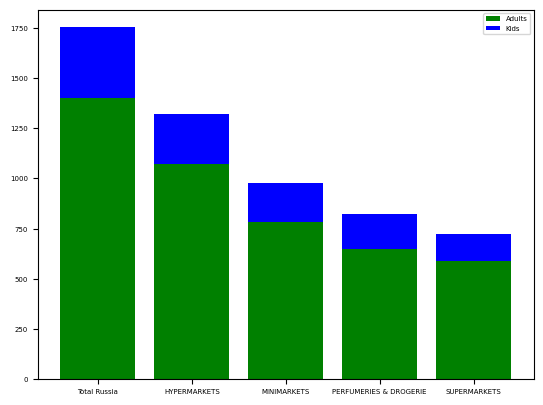

In [ ]:
plt.rcParams.update({'font.size': 5})

fig, ax = plt.subplots()
ax.bar(terms, first_param, color='g', label='Adults')
ax.bar(terms, second_param, color='b', label='Kids', bottom=first_param)

ax.legend()
plt.show()

In [ ]:
dataFrame = []
names = []
for name in df['Area_Hierarchy'].unique():
  mask = df['Area_Hierarchy'] == name
  masked = df.loc[mask]
  dataFrame.append(list(masked['Subbrand'].value_counts()))
  names.append(masked['Subbrand'].unique())

In [ ]:
import matplotlib.pyplot as plt

terms = df['Area_Hierarchy'].unique()

mentions = []
for data in df['Area_Hierarchy'].value_counts():
  mentions.append(data)

params = []
for data in dataFrame:
  params.append(data)

In [ ]:
completed_data = []

for i in range(273):
  temp = []
  for j in range(5):
    if (len(dataFrame[j]) <= i): 
      temp.append(0)
      continue
    temp.append(dataFrame[j][i])
  completed_data.append(temp)

In [ ]:
completed_names = []

for i in range(273):
  temp = []
  for j in range(5):
    if (len(names[j]) <= i): 
      temp.append("null")
      continue
    temp.append(names[j][i])
  completed_names.append(temp)

In [ ]:
completed_data.sort(reverse=True)
completed_names.sort(reverse=True)

In [ ]:
completed_data[0]

[1135, 810, 538, 437, 361]

In [ ]:
completed_names[0]

['ZIGZAG CHARCOAL',
 '3D WHITE LUX PRO-FLEX',
 '3D WHITE WHITENING BLACK',
 'CARIES PROTECTION',
 'FORTE EXPERT']